In [48]:
# import sklearn
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
iris = load_iris()
data = iris['data']
target = iris['target']
print(data.shape)
print(type(data))
      
print(data[:3])

(150, 4)
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [13]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
iris_df = pd.DataFrame(data=data, columns=iris['feature_names'])
iris_df['species'] = target
species_dict = dict(zip([0, 1, 2], iris['target_names']))
iris_df['species'] = iris_df['species'].map(species_dict)    
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [25]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
i = np.identity(4)
i

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [36]:
sparse_matrix = sparse.csr_matrix(i)
sparse_matrix

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [42]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:>

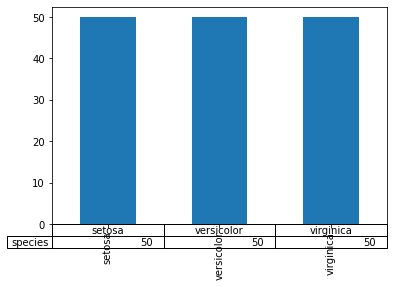

In [57]:
iris_df.species.value_counts().plot(kind='bar', table=True)

In [61]:
iris_df.iloc[:, [0, 1, 2, 3]].value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
5.8                2.7               5.1                1.9                 2
6.2                2.2               4.5                1.5                 1
                   2.9               4.3                1.3                 1
                   3.4               5.4                2.3                 1
6.3                2.3               4.4                1.3                 1
                                                                           ..
5.4                3.9               1.3                0.4                 1
                                     1.7                0.4                 1
5.5                2.3               4.0                1.3                 1
                   2.4               3.7                1.0                 1
7.9                3.8               6.4                2.0                 1
Length: 149, dtype: int64

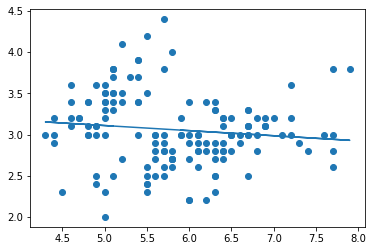

0.013822654141080748


In [89]:
X = iris_df.iloc[:, 0].values.reshape(-1, 1)
Y = iris_df.iloc[:, 1].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_Pred = lin_reg.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_Pred)
plt.show()

print(lin_reg.score(X, Y))

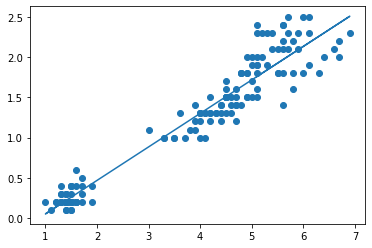

0.9271098389904927
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [91]:
X = iris_df.iloc[:, 2].values.reshape(-1, 1)
Y = iris_df.iloc[:, 3].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
Y_Pred = lin_reg.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_Pred)
plt.show()
print(lin_reg.score(X, Y))
print(lin_reg.get_params())

In [93]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
